In [29]:
'''
(1) - Cổ phiếu phải có tín hiệu giá đang di chuyển, tiêu chí để nhận biết là giá tăng ở mức độ hợp lý (~2%)
(2) - Tiêu chí thứ 2 là phải có khối lượng tăng cao so với trung bình phía trước, để chứng tỏ là dòng tiền đang vào
(3) - Cổ phiếu phải có tín hiệu rõ ràng, chẳng hạn phục hồi từ đáy hoặc nền giá
'''

import pandas as pd
import TaiPM
import datetime
#Cấu hình pandas
pd.options.display.float_format='{:,.2f}'.format
pd.set_option('display.width',85)

class StockMarketData:
    #format dd-mm-yyyy
    def __init__(self,day,month,year, san) -> None:
        self.day = day
        self.month = str(month)
        self.year = str(year)
        if(len(str(day))<2):
            day = '0' + str(day)
        if(len(str(month))<2):
            month = '0' + str(month)
        self.url = f'https://s.cafef.vn/TraCuuLichSu2/1/{san}/{day}/{month}/{year}.chn'
        #self.GetMarketData()
        print(self.url)
        
    def GetMarketData(self):
        items = pd.read_html(self.url)
        LEN = len(items)
        df = items[LEN-1]    
        df.rename(columns = {0:'Symbol', 
                            1:'Close',
                            2:'%',                         
                            3:'TC',
                            4:'TC',
                            5:'Open',
                            6:'High',
                            7:'Low',
                            8:'Volume',
                            9:'GT-TT'}, inplace = True)    
        df = df[0:len(df)-1]    
        df['Volume'] = df['Volume'].astype(float)
        df['%'] = df['%'].apply(lambda x: x.split(' ')[1][1:])
        df['%'] = df['%'].astype(float)
        df['Close'] = df['Close'].astype(float)
        df['High'] = df['High'].astype(float)
        df['Open'] = df['Open'].astype(float)
        df['Low'] = df['Low'].astype(float)
        
        return df 
        
    def GetStocksByDragonFly(self):
        df = self.GetMarketData()
        
        #Lọc theo điều kiện
        df = df[(df['High']==df['Close'])] #1: Giá đóng cửa là giá cao nhất
        df = df[df['Volume'] > 50000] #Bước 2: Thanh khoản phải lớn hơn 50k cổ phiếu
        df = df[df['%'] >= 2] #Bước 03: Biên độ lớn hơn 3%
        #df = df[df['Close'] >= 7] #Bước 04: Loại bớt các cổ phiếu penny
        
        del df['TC']
        df = df.reset_index(drop=True)
        return df
    
    def GetRecommendStocks(self):
        stocks = self.GetStocksByDragonFly()['Symbol']
        stocks = list(stocks)
        recommends = []
        for stock in stocks:
            _day = datetime.datetime(TaiPM.THIS_YEAR, TaiPM.THIS_MONTH, self.day)
            recommends.append([stock,_day])
        return recommends

    def ToString(self):
        print(self.url)
        print('Recommend stocks: ')
        print(self.GetRecommendStocks())



NGHIÊN CỨU XEM DỮ LIỆU CỦA TUẦN NÀY CÓ ĐÚNG KO

(1) - Lấy dữ liệu của các ngày từ đầu tuần đến nay (ngày 1 đến ngày 4)
(2) - Lập danh sách được khuyến nghị
(3) - Kiểm tra xem giá hiện tại có ok ko

days = [1,2,3]

In [30]:
days = [1,2,3]
all_stocks = []
for day in days:
    market = StockMarketData(day=day,month=TaiPM.THIS_MONTH,year=TaiPM.THIS_YEAR, san='HOSE')
    stocks = market.GetRecommendStocks()
    for s in stocks:
        all_stocks.append(s)

print(all_stocks)

https://s.cafef.vn/TraCuuLichSu2/1/HOSE/01/08/2022.chn


/var/folders/yh/8sh178dj7m57vt5x3pxmjw3c0000gn/T/ipykernel_36939/1957226490.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume'] = df['Volume'].astype(float)
/var/folders/yh/8sh178dj7m57vt5x3pxmjw3c0000gn/T/ipykernel_36939/1957226490.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['%'] = df['%'].apply(lambda x: x.split(' ')[1][1:])
/var/folders/yh/8sh178dj7m57vt5x3pxmjw3c0000gn/T/ipykernel_36939/1957226490.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

https://s.cafef.vn/TraCuuLichSu2/1/HOSE/02/08/2022.chn


/var/folders/yh/8sh178dj7m57vt5x3pxmjw3c0000gn/T/ipykernel_36939/1957226490.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume'] = df['Volume'].astype(float)
/var/folders/yh/8sh178dj7m57vt5x3pxmjw3c0000gn/T/ipykernel_36939/1957226490.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['%'] = df['%'].apply(lambda x: x.split(' ')[1][1:])
/var/folders/yh/8sh178dj7m57vt5x3pxmjw3c0000gn/T/ipykernel_36939/1957226490.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

https://s.cafef.vn/TraCuuLichSu2/1/HOSE/03/08/2022.chn
[['TLG', datetime.datetime(2022, 8, 1, 0, 0)], ['VND', datetime.datetime(2022, 8, 1, 0, 0)], ['PTC', datetime.datetime(2022, 8, 1, 0, 0)], ['FTS', datetime.datetime(2022, 8, 1, 0, 0)], ['ITC', datetime.datetime(2022, 8, 1, 0, 0)], ['CTS', datetime.datetime(2022, 8, 1, 0, 0)], ['NKG', datetime.datetime(2022, 8, 1, 0, 0)], ['SSI', datetime.datetime(2022, 8, 1, 0, 0)], ['HSG', datetime.datetime(2022, 8, 1, 0, 0)], ['DAH', datetime.datetime(2022, 8, 1, 0, 0)], ['DBC', datetime.datetime(2022, 8, 1, 0, 0)], ['AGR', datetime.datetime(2022, 8, 1, 0, 0)], ['VCI', datetime.datetime(2022, 8, 1, 0, 0)], ['DXG', datetime.datetime(2022, 8, 1, 0, 0)], ['HAP', datetime.datetime(2022, 8, 1, 0, 0)], ['VPI', datetime.datetime(2022, 8, 1, 0, 0)], ['CTG', datetime.datetime(2022, 8, 1, 0, 0)], ['ANV', datetime.datetime(2022, 8, 1, 0, 0)], ['BKG', datetime.datetime(2022, 8, 1, 0, 0)], ['GMD', datetime.datetime(2022, 8, 1, 0, 0)], ['BID', datetime.datetim

/var/folders/yh/8sh178dj7m57vt5x3pxmjw3c0000gn/T/ipykernel_36939/1957226490.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume'] = df['Volume'].astype(float)
/var/folders/yh/8sh178dj7m57vt5x3pxmjw3c0000gn/T/ipykernel_36939/1957226490.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['%'] = df['%'].apply(lambda x: x.split(' ')[1][1:])
/var/folders/yh/8sh178dj7m57vt5x3pxmjw3c0000gn/T/ipykernel_36939/1957226490.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [31]:
import pandas as pd
import numpy as np
import datetime as dt# Xử lý ngày tháng
import investpy

def GetProfit(symbol,start,end):
    #start = "01/01/2015"
    #end  = dt.datetime.now().strftime("%d/%m/%Y")
    company = symbol
    df_stock = investpy.get_stock_historical_data(stock= company, country= 'vietnam', from_date = start, to_date = end)
    p_start = df_stock['Close'][0]
    p_end = df_stock['Close'][-1]
    profit = ((p_end-p_start)/p_start)*100
    print(f'{p_start} -> {p_end} : {profit}')
    return profit

x = GetProfit('VND',"01/08/2022","04/08/2022")
print(x)

20400.0 -> 21200.0 : 3.9215686274509802
3.9215686274509802


In [34]:
# stocks = set(all_stocks)
# print(stocks)


from datetime import datetime


rs = []
df = pd.DataFrame()
for item in all_stocks:    
    symbol = item[0]    
    start = item[1].strftime("%d/%m/%Y")
    end = datetime.now().strftime("%d/%m/%Y")    
    if(start.split('/')[0] != end.split('/')[0]):
        try:
            profit = GetProfit(symbol=symbol,start=start,end=end)
            rs.append([symbol,profit])
        except:
            print(f'Lỗi: {symbol}')
df = pd.DataFrame(rs,columns=['Stock','Profit'])
print(df)


Lỗi: TLG
Lỗi: VND
Lỗi: PTC
Lỗi: FTS
Lỗi: ITC
Lỗi: CTS
Lỗi: NKG
Lỗi: SSI
Lỗi: HSG
Lỗi: DAH
Lỗi: DBC
Lỗi: AGR
Lỗi: VCI
Lỗi: DXG
Lỗi: HAP
Lỗi: VPI
Lỗi: CTG
Lỗi: ANV
Lỗi: BKG
Lỗi: GMD
Lỗi: BID
Lỗi: DGW
Lỗi: BCG
Lỗi: VNG
Lỗi: APH
Lỗi: PVT
Lỗi: DRC
Lỗi: VRE
Lỗi: PAN
Lỗi: GVR
Lỗi: MBB
Lỗi: VCB
Lỗi: PET
Lỗi: SAM
Lỗi: CSV
Lỗi: HAI
Lỗi: HAR
Lỗi: TGG
Lỗi: CRC
Lỗi: LDG
Lỗi: JVC
Lỗi: ITA
Lỗi: SJF
Lỗi: TTB
Lỗi: TSC
Lỗi: VNL
Lỗi: QCG
Lỗi: TDC
Lỗi: FLC
Lỗi: ST8
Lỗi: HAX
Lỗi: SAM
Lỗi: ORS
Lỗi: DRH
Lỗi: ITC
Lỗi: HAG
Lỗi: ROS
Lỗi: AMD
Lỗi: NAF
Lỗi: TVB
Lỗi: ADS
Lỗi: VSH
Lỗi: LCM
Lỗi: DLG
Lỗi: FCM
Lỗi: VIC
Lỗi: HSL
Lỗi: TNI
Lỗi: MCG
Lỗi: PTL
Lỗi: GMH
Lỗi: BFC
Lỗi: APG
Lỗi: TVB
Lỗi: HVX
Lỗi: PTL
Lỗi: HSG
Lỗi: HNG
Lỗi: NKG
Lỗi: VTO
Lỗi: HID
Lỗi: STK
Lỗi: PC1
Lỗi: CTR
Lỗi: HVH
Lỗi: TNA
Lỗi: BAF
Lỗi: VCI
Lỗi: DQC
Lỗi: BMI
Lỗi: CTD
Lỗi: TCO
Lỗi: BID
Empty DataFrame
Columns: [Stock, Profit]
Index: []


In [31]:
import Stock

#1. HOSE : Sàn sài gòn
#2. HASTC: Sàn Hà Nội
#3. UPCOM: Sàn UPCOM

#market = StockMarketData(day=TaiPM.THIS_DAY,month=TaiPM.THIS_MONTH,year=TaiPM.THIS_YEAR, san='HOSE')
san = ['HOSE','HASTC','UPCOM']
all_stocks = []
for item in san:
    try:
        market = StockMarketData(day=TaiPM.THIS_DAY,month=TaiPM.THIS_MONTH,year=TaiPM.THIS_YEAR, san=item)
        market.ToString()
        stocks = market.GetRecommendStocks()
        all_stocks.append(stocks)
    except:
        print(f'Lỗi sàn {item}')
print(all_stocks)
    

https://s.cafef.vn/TraCuuLichSu2/1/HOSE/3/08/2022.chn
https://s.cafef.vn/TraCuuLichSu2/1/HOSE/3/08/2022.chn
Recommend stocks: 


/var/folders/yh/8sh178dj7m57vt5x3pxmjw3c0000gn/T/ipykernel_86374/3105879272.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume'] = df['Volume'].astype(float)
/var/folders/yh/8sh178dj7m57vt5x3pxmjw3c0000gn/T/ipykernel_86374/3105879272.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['%'] = df['%'].apply(lambda x: x.split(' ')[1][1:])
/var/folders/yh/8sh178dj7m57vt5x3pxmjw3c0000gn/T/ipykernel_86374/3105879272.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

['UDC', 'PTL', 'TGG', 'DC4', 'DQC', 'NHA', 'AAT', 'SKG', 'VCB', 'NVL']


/var/folders/yh/8sh178dj7m57vt5x3pxmjw3c0000gn/T/ipykernel_86374/3105879272.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume'] = df['Volume'].astype(float)
/var/folders/yh/8sh178dj7m57vt5x3pxmjw3c0000gn/T/ipykernel_86374/3105879272.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['%'] = df['%'].apply(lambda x: x.split(' ')[1][1:])
/var/folders/yh/8sh178dj7m57vt5x3pxmjw3c0000gn/T/ipykernel_86374/3105879272.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

https://s.cafef.vn/TraCuuLichSu2/1/HASTC/3/08/2022.chn
https://s.cafef.vn/TraCuuLichSu2/1/HASTC/3/08/2022.chn
Recommend stocks: 


/var/folders/yh/8sh178dj7m57vt5x3pxmjw3c0000gn/T/ipykernel_86374/3105879272.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume'] = df['Volume'].astype(float)


Lỗi sàn HASTC
https://s.cafef.vn/TraCuuLichSu2/1/UPCOM/3/08/2022.chn
https://s.cafef.vn/TraCuuLichSu2/1/UPCOM/3/08/2022.chn
Recommend stocks: 
Lỗi sàn UPCOM
[['UDC', 'PTL', 'TGG', 'DC4', 'DQC', 'NHA', 'AAT', 'SKG', 'VCB', 'NVL']]


/var/folders/yh/8sh178dj7m57vt5x3pxmjw3c0000gn/T/ipykernel_86374/3105879272.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume'] = df['Volume'].astype(float)


In [32]:

lst = []
errors = []
for symbol in stocks:
    try:
        s = Stock.Stock(symbol)    
        s.Prepare()
        lst.append(
            [
                s.name,
                s.Get_TyLeSong(T=10,percent=3),
                s.Money
             ]) #Độ dao động giá = 3%
    except:
        errors.append(symbol)

df = pd.DataFrame(lst,columns=['Symbol','Ratio','Money'])
df = df.sort_values(by=['Ratio'],ascending=False)
df = df.reset_index(drop=True)
print(df)
    

#XẾP HẠNG THEO TỶ LỆ SÓNG


Cổ phiếu chưa có trong danh mục
Cổ phiếu chưa có trong danh mục
Cổ phiếu chưa có trong danh mục
Cổ phiếu chưa có trong danh mục
  Symbol  Ratio          Money
0    DQC   0.40  10,921,770.00
1    SKG   0.40  24,798,360.00
2    NHA   0.20  10,923,630.00
3    VCB   0.20 186,540,750.00
4    PTL   0.00     906,824.00
5    NVL   0.00 288,919,250.00


In [33]:
print(errors)

['UDC', 'TGG', 'DC4', 'AAT']


HVX


No handles with labels found to put in legend.


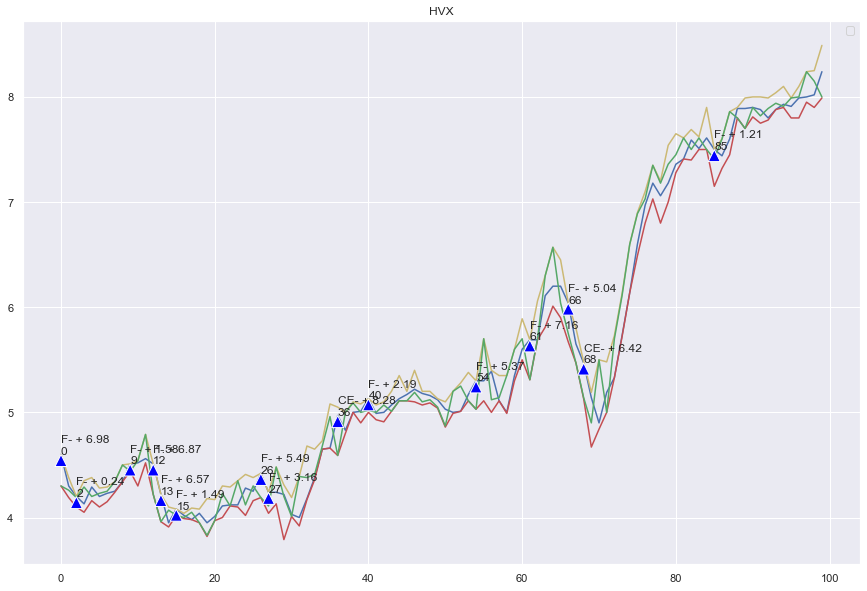

TVB


No handles with labels found to put in legend.


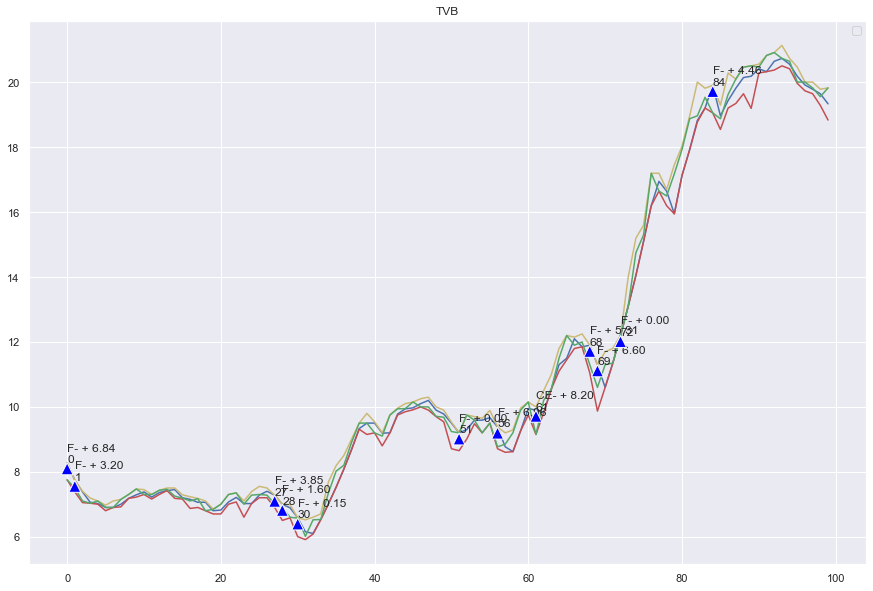

NKG


No handles with labels found to put in legend.


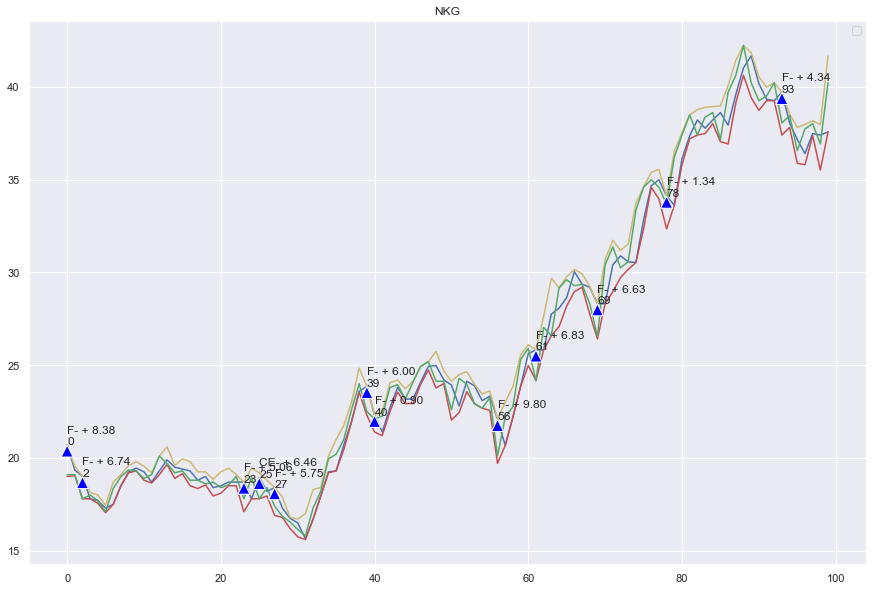

VTO


No handles with labels found to put in legend.


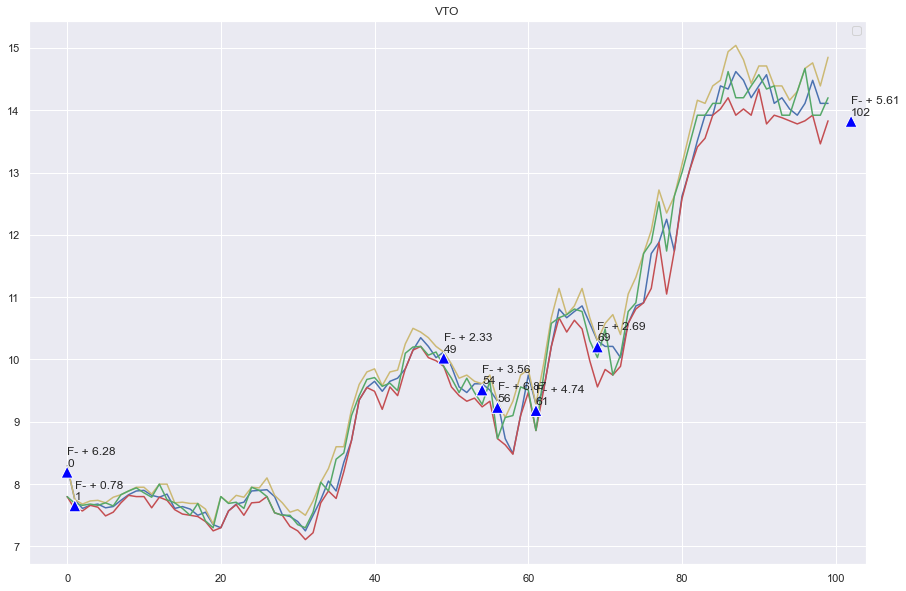

APG


No handles with labels found to put in legend.


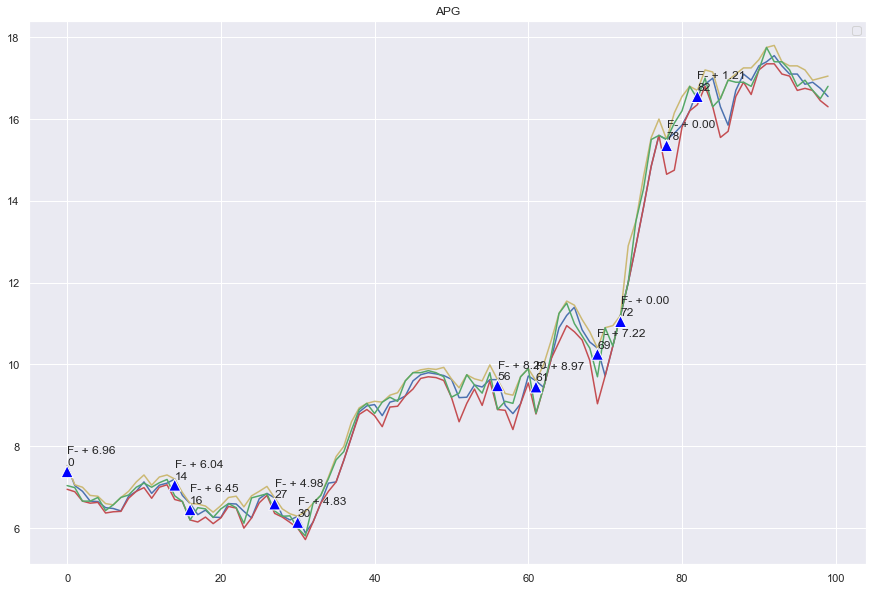

PTL


No handles with labels found to put in legend.


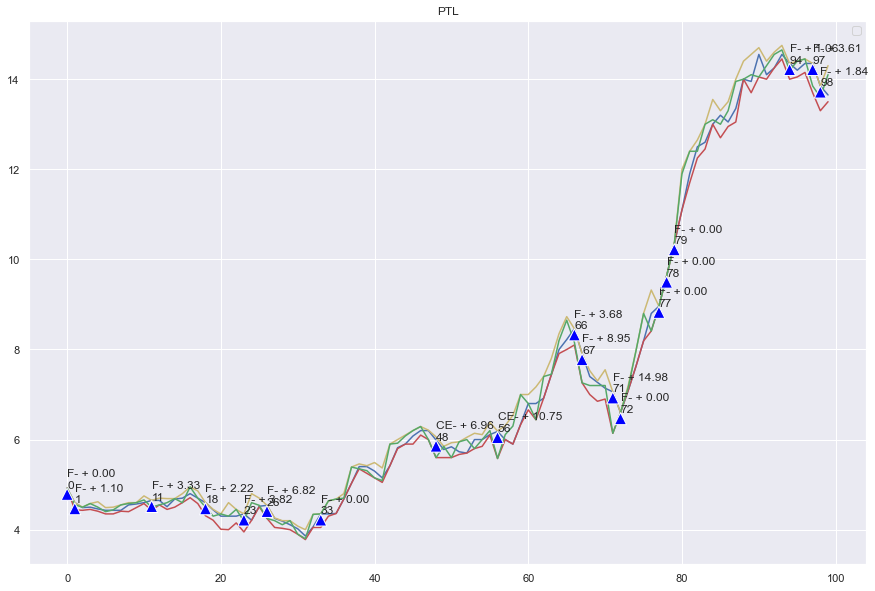

HNG


No handles with labels found to put in legend.


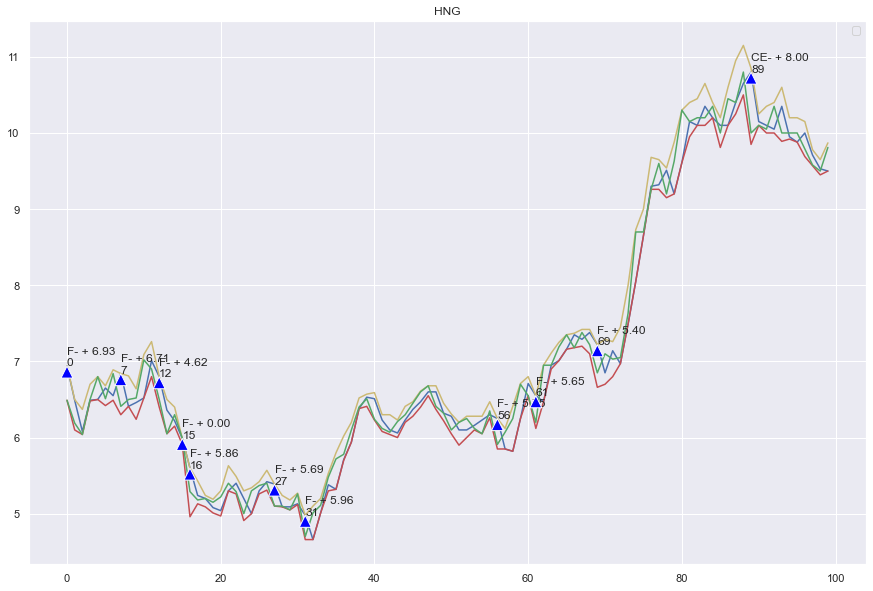

HSG


No handles with labels found to put in legend.


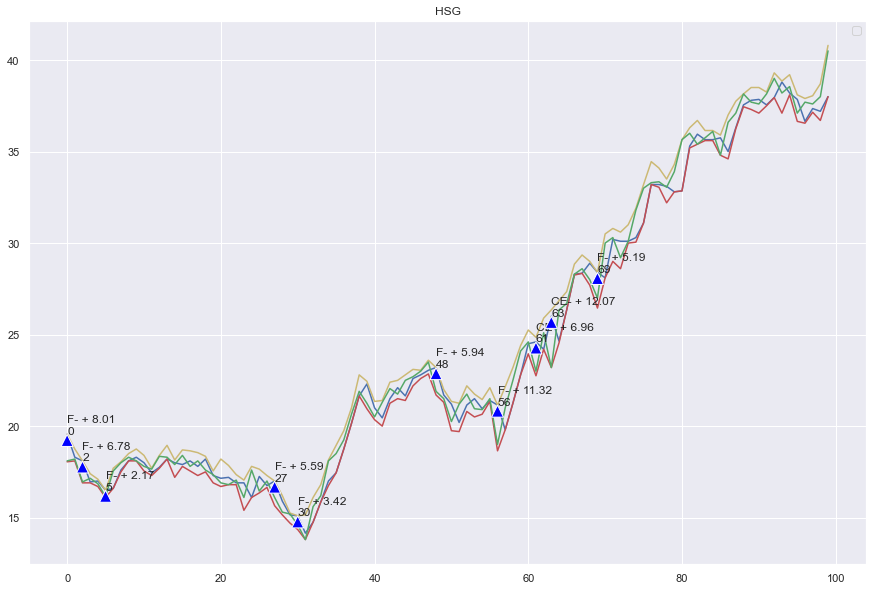

HID


No handles with labels found to put in legend.


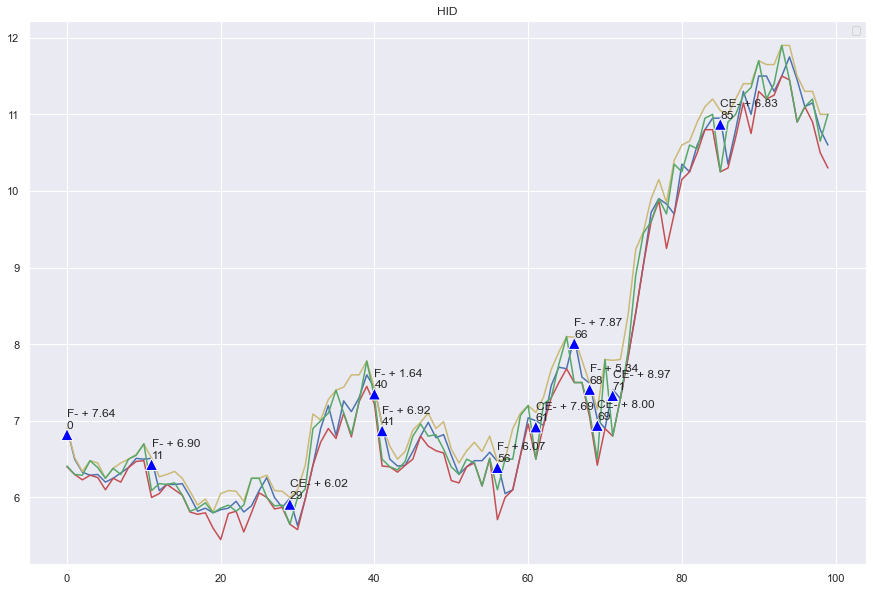

STK


No handles with labels found to put in legend.


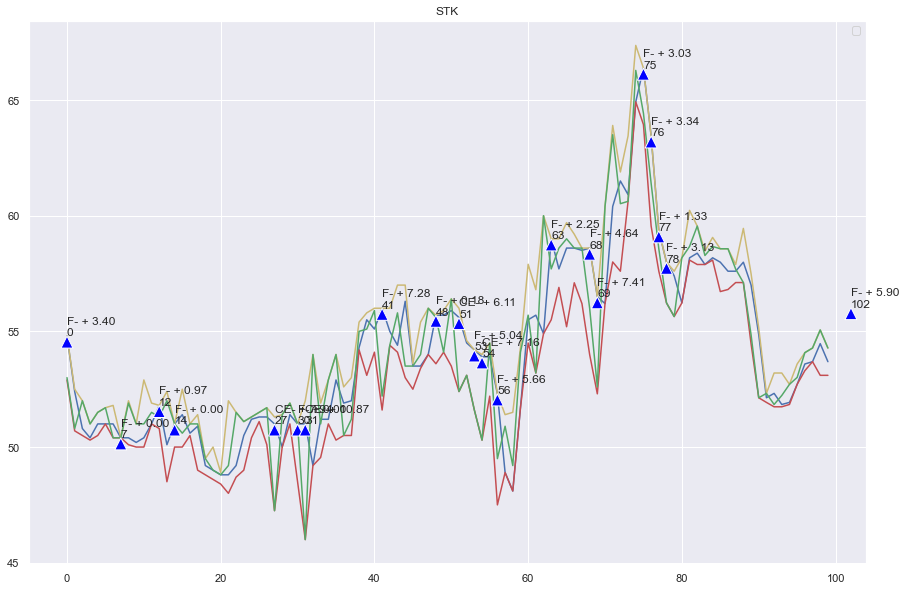

PC1


No handles with labels found to put in legend.


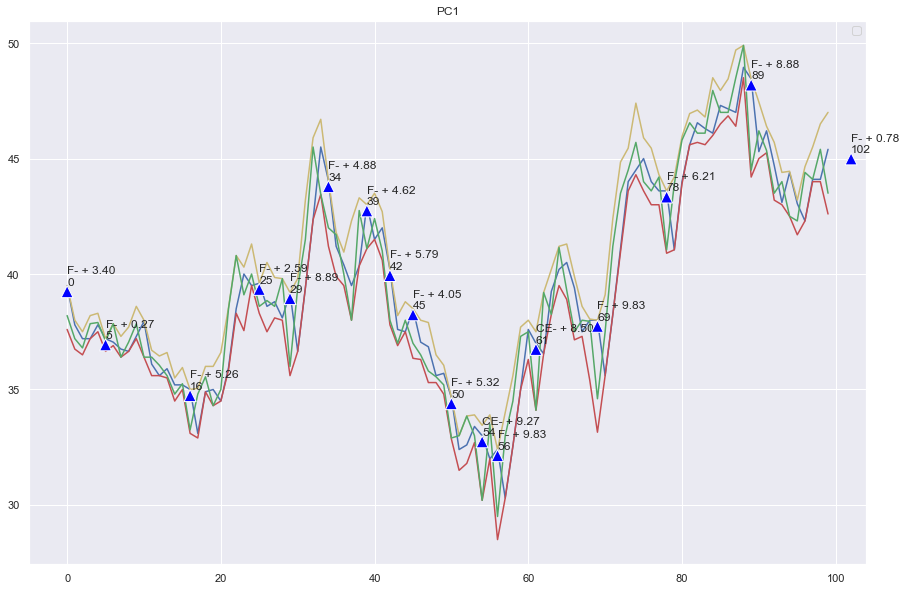

CTR


No handles with labels found to put in legend.


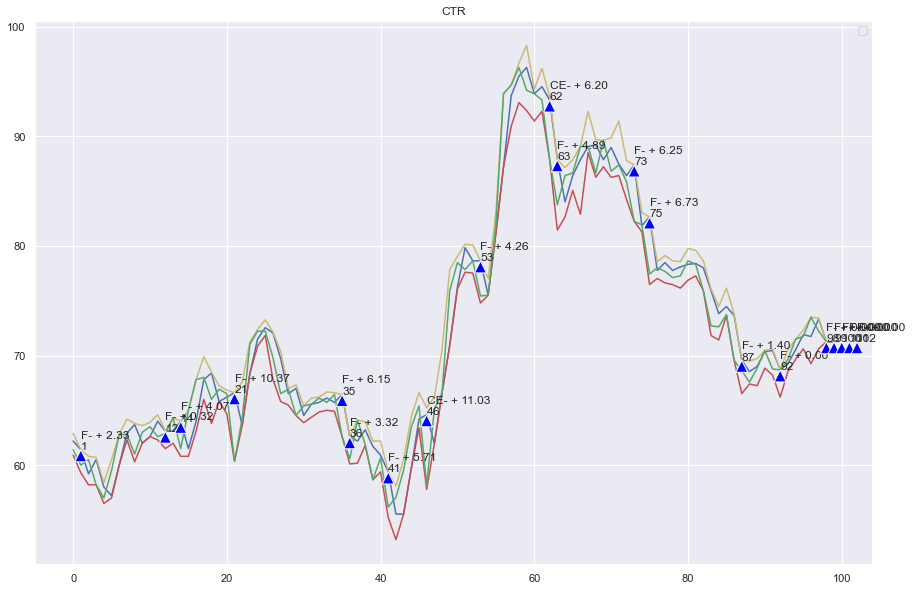

HVH


No handles with labels found to put in legend.


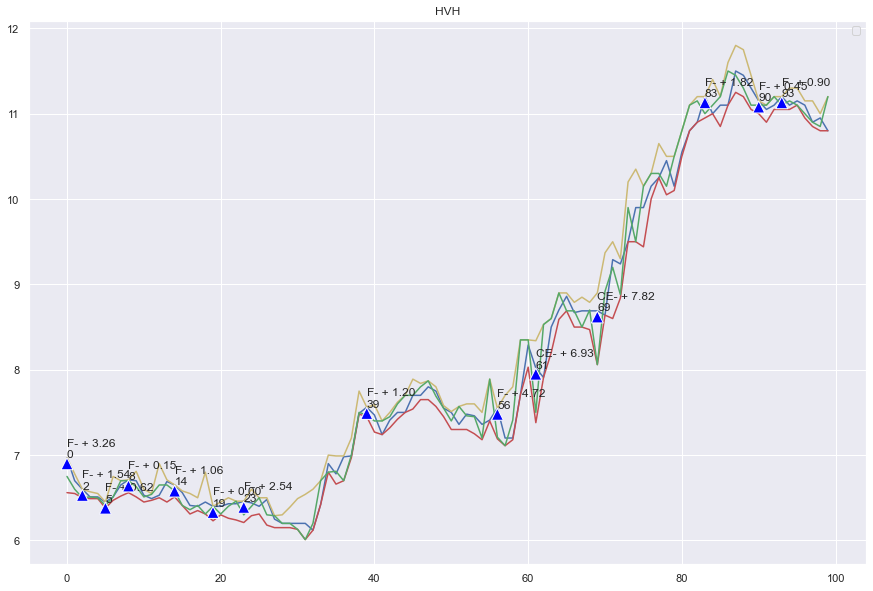

TNA


No handles with labels found to put in legend.


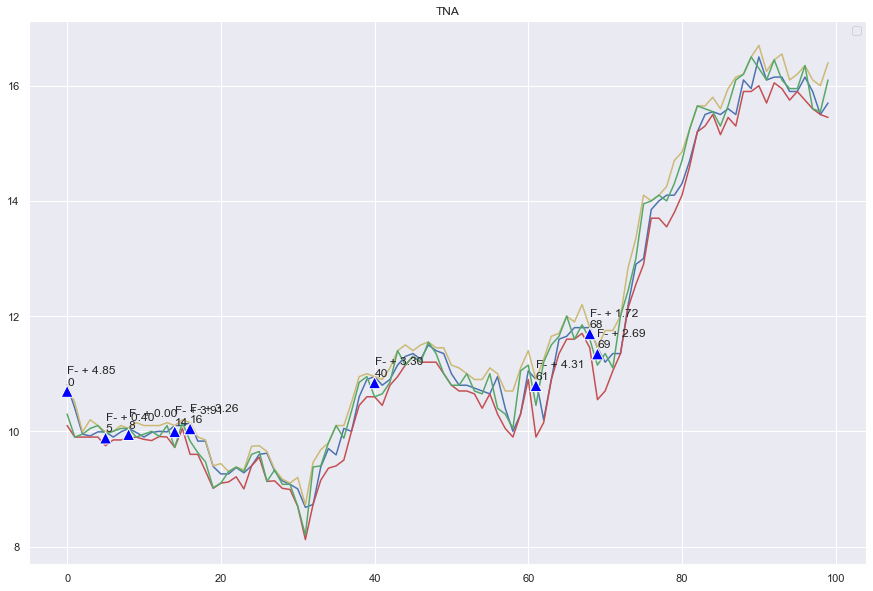

BAF


/Users/taipm/Documents/GitHub/StockUp/Stock.py:162: RuntimeWarning: divide by zero encountered in double_scalars
  output += f'\n&CN: {"{:.2f}".format(((self.P - self.MAX_P)/self.MAX_P)*100)} (%) | &TN: {"{:.2f}".format(((self.P - self.MIN_P)/self.MIN_P)*100)} (%)'
No handles with labels found to put in legend.


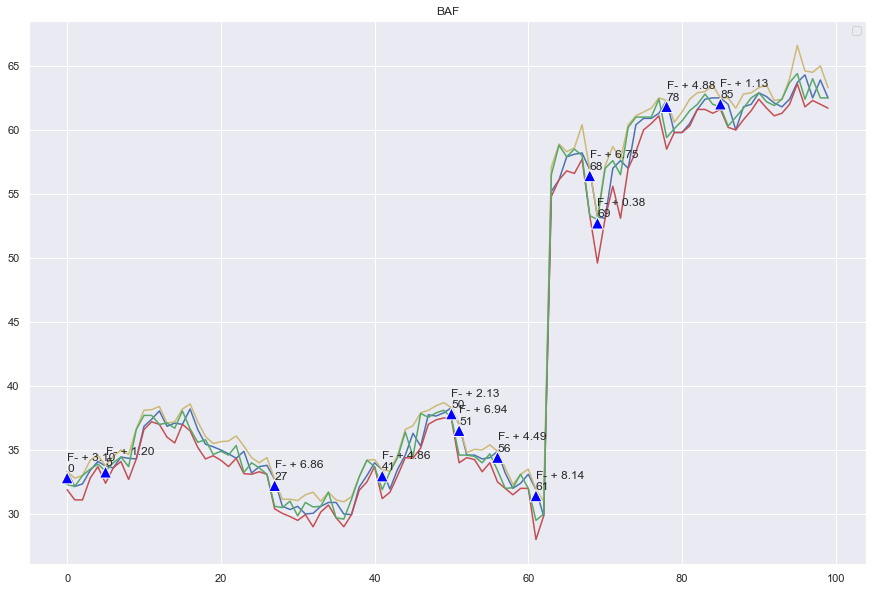

VCI


No handles with labels found to put in legend.


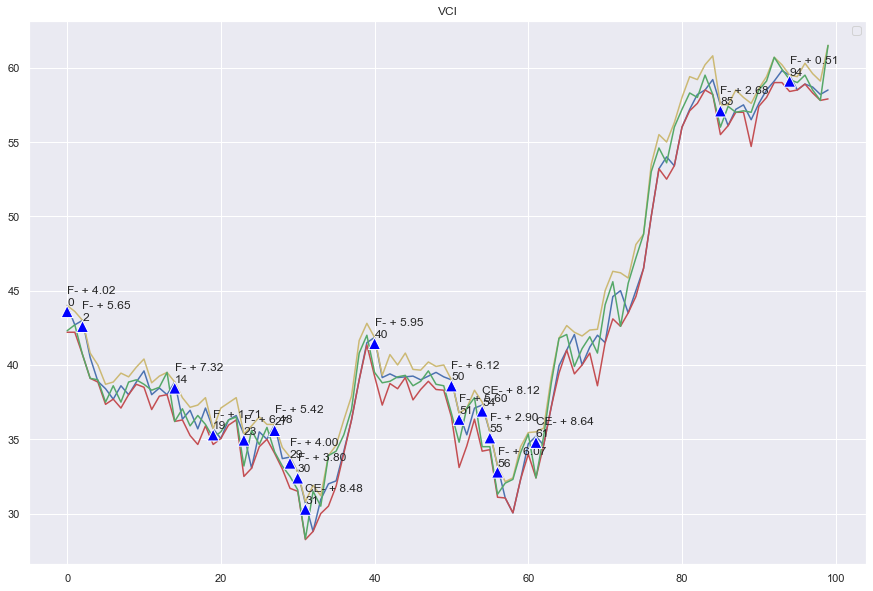

DQC


No handles with labels found to put in legend.


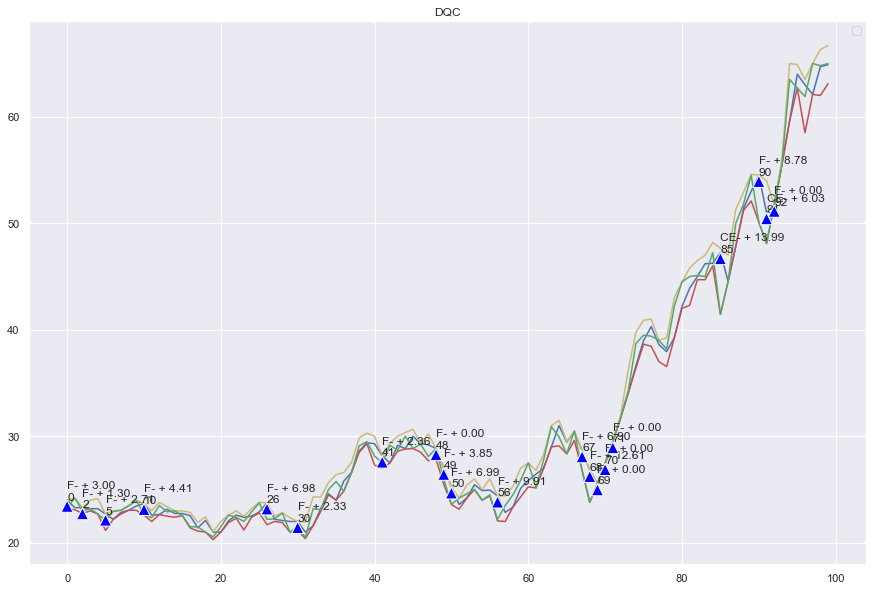

In [29]:
from time import sleep

errors = []
for symbol in stocks:
    try:
        print(symbol)
        s = Stock.Stock(name=symbol)
        s.Prepare()
        s.DrawWithForcecast(100)
        sleep(1)
    except:
        errors.append(symbol)
if(len(errors)>0):
    print(f'Danh sách các cổ phiếu lỗi do chưa có dữ liệu trong API {errors}')

In [29]:
import MyDocX
doc = MyDocX.MyDocX("daily",'report')

df_stocks = GetStocksByDragonFly()
doc.AddContent(df_stocks.to_markdown())


/var/folders/yh/8sh178dj7m57vt5x3pxmjw3c0000gn/T/ipykernel_91129/2578255318.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume'] = df['Volume'].astype(float)
/var/folders/yh/8sh178dj7m57vt5x3pxmjw3c0000gn/T/ipykernel_91129/2578255318.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['%'] = df['%'].apply(lambda x: x.split(' ')[1][1:])
/var/folders/yh/8sh178dj7m57vt5x3pxmjw3c0000gn/T/ipykernel_91129/2578255318.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 